### Dataset

In [89]:
# Dataset: salary_Data.csv
# location: https://mitu.co.in/dataset

### Import the libraries

In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Read the Data

In [136]:
df = pd.read_csv('Salary_Data.csv')

In [137]:
df

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


In [138]:
df.shape

(30, 2)

### Separate the input and output data

In [139]:
x = df[['YearsExperience']]
y = df['Salary']

In [140]:
x

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2
5,2.9
6,3.0
7,3.2
8,3.2
9,3.7


### Explore the data

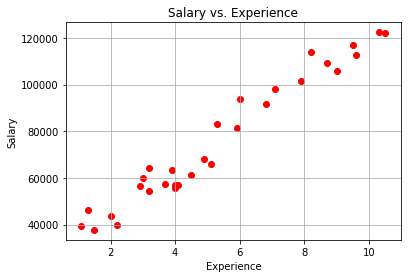

In [141]:
plt.title('Salary vs. Experience')
plt.grid()
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.scatter(x, y, color ='r')

### Cross Validation

In [142]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=0)

In [143]:
x_train.shape

(22, 1)

In [144]:
x_test.shape

(8, 1)

In [145]:
x_train

,YearsExperience
17,5.3
22,7.9
5,2.9
16,5.1
8,3.2
14,4.5
23,8.2
20,6.8
1,1.3
29,10.5


### Build the model

In [146]:
from sklearn.linear_model import LinearRegression

In [147]:
regressor = LinearRegression()

In [148]:
regressor.fit(x_train, y_train)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [149]:
# value of m
regressor.coef_

array([9379.71049195])

In [150]:
# Value of c 
regressor.intercept_

26986.691316737248

In [151]:
y_pred = regressor.predict(x_test)

In [152]:
y_pred

array([ 41056.25705466, 123597.70938378,  65443.50433372,  63567.56223533,
       116093.94099022, 108590.17259667, 117031.91203942,  64505.53328452])

In [153]:
y_test.values

array([ 37731, 122391,  57081,  63218, 116969, 109431, 112635,  55794],
      dtype=int64)

In [154]:
result = pd.DataFrame({
    'Actual in Dataset': y_test,
    'Predicted by Algo': y_pred
})

In [155]:
result


,Actual in Dataset,Predicted by Algo
2,37731,41056.257055
28,122391,123597.709384
13,57081,65443.504334
10,63218,63567.562235
26,116969,116093.940990
24,109431,108590.172597
27,112635,117031.912039
11,55794,64505.533285


### Performance Evaluation

In [156]:
# Mean absolute error
np.mean(abs(y_test - y_pred))

3508.5455930660555

In [162]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

3508.5455930660555

In [164]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test, y_pred)

ImportError: cannot import name 'mean_absolute_percentage_error' from 'sklearn.metrics' (C:\Anaconda\lib\site-packages\sklearn\metrics\__init__.py)

In [114]:
# R.Squared Error / Accuracy of Linearlity
regressor.score('x_train, y_train')

TypeError: score() missing 1 required positional argument: 'y'

In [115]:
# R.Squared Error / Accuracy of Linearlity
regressor.score('x_test, y_test')

TypeError: score() missing 1 required positional argument: 'y'

In [116]:
regressor.fit(x,y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [117]:
y_pred = regressor.predict(x)

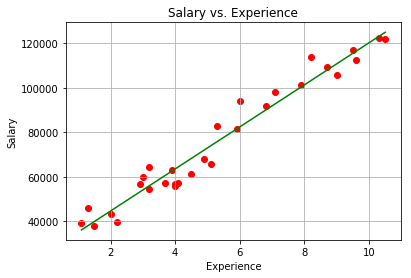

In [118]:
plt.title('Salary vs. Experience')
plt.grid()
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.scatter(x, y, color ='r', label='Actual')
plt.plot(x,y_pred,color = 'g', label='predicted')

In [122]:
regressor.predict([[12]])

array([139191.74805613])

In [123]:
regressor.predict([[15]])

array([167541.63502049])

In [125]:
regressor.predict([[0.5]])

array([30517.1813594])

In [128]:
regressor.coef_[0]* 15 + regressor.intercept_

167541.6350204948